In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
raw_data = pd.read_csv("access_log-20210716",sep=" ")
raw_data.to_csv("log.csv")

In [7]:
data=pd.read_csv('log.csv', skiprows=2, names=['IP','Dash','Dash1','Date','TimeZone','Request_Header',
                                               'Status_code','Byte_tansfer','Blank','Browser_Name'])
df = pd.DataFrame(data=data)
data1 = df.drop(df.columns[[1,2,3,4,5,7,8,9]], axis = "columns")
data1

,IP,Status_code
1,192.168.99.1,200
2,192.168.99.1,304
3,192.168.99.1,200
4,192.168.99.1,304
5,192.168.99.1,200
...,...,...
252,192.168.99.1,404
253,192.168.99.1,404
254,192.168.99.1,200
255,192.168.99.1,200


In [8]:
IP=data1['IP']
data1['IP'].value_counts()

192.168.99.1      253
192.168.99.101      3
Name: IP, dtype: int64

In [9]:
Status_code=data1['Status_code']
data1['Status_code'].value_counts()

200    163
304     67
500     17
404      7
408      2
Name: Status_code, dtype: int64

In [11]:
data12=data1.groupby(["IP", "Status_code"]).size().reset_index(name="frequency")
data12

,IP,Status_code,frequency
0,192.168.99.1,200,162
1,192.168.99.1,304,67
2,192.168.99.1,404,6
3,192.168.99.1,408,2
4,192.168.99.1,500,16
5,192.168.99.101,200,1
6,192.168.99.101,404,1
7,192.168.99.101,500,1


In [12]:
train_data = data12.drop(['IP'], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
data_scaled = sc.fit_transform(train_data)
print(data_scaled)

[[-1.47941906  2.43298984]
 [-0.54693674  0.65503573]
 [ 0.34968087 -0.48659797]
 [ 0.38554557 -0.56145919]
 [ 1.21043378 -0.2994449 ]
 [-1.47941906 -0.5801745 ]
 [ 0.34968087 -0.5801745 ]
 [ 1.21043378 -0.5801745 ]]


In [24]:
import numpy as np
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=3) 
pred = model.fit_predict(data_scaled)
pred

array([2, 0, 1, 1, 1, 0, 1, 1])

In [25]:
data_pred = pd.DataFrame(data_scaled, columns=['Status_Scaled','Frequency_scaled'])
data_pred['Clusters'] = pred
final_data = pd.concat([data12, data_pred], axis=1)
final_data

,IP,Status_code,frequency,Status_Scaled,Frequency_scaled,Clusters
0,192.168.99.1,200,162,-1.479419,2.432990,2
1,192.168.99.1,304,67,-0.546937,0.655036,0
2,192.168.99.1,404,6,0.349681,-0.486598,1
3,192.168.99.1,408,2,0.385546,-0.561459,1
4,192.168.99.1,500,16,1.210434,-0.299445,1
5,192.168.99.101,200,1,-1.479419,-0.580175,0
6,192.168.99.101,404,1,0.349681,-0.580175,1
7,192.168.99.101,500,1,1.210434,-0.580175,1


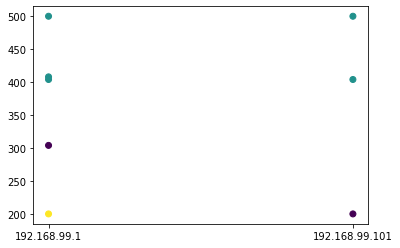

In [29]:
plt.scatter(final_data['IP'], final_data['Status_code'], c=final_data['Clusters'])

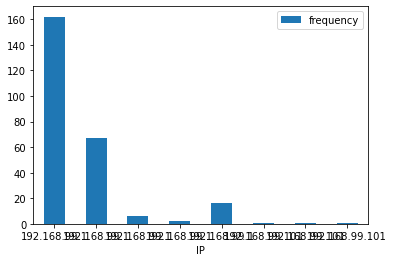

In [30]:
final_data.plot.bar(x='IP', y='frequency', rot=0)